# Chapter 5 Deep Learning for computer vision

## 5.1 Introduction to convnets

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.1805 - acc: 0.9440
Epoch 2/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0487 - acc: 0.9852
Epoch 3/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0326 - acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0244 - acc: 0.9925
Epoch 5/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0207 - acc: 0.9937


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 87us/step


In [6]:
test_acc

0.9921

In [7]:
import keras.backend as K

del model
K.clear_session()

## 5.2 Training a convnet from scratch on a small dataset

In [11]:
import os, shutil

original_dataset_dir = '../data/train/'

# The directory where we will store our smaller dataset
base_dir = '../data/cats_and_dogs_small'
os.makedirs(base_dir, exist_ok=True)

# Create {train, valid, test} data directories
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
valid_dir = os.path.join(base_dir, 'valid')
os.makedirs(valid_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)


# Create {train, valid, test} data directories for each class
# TRAINING
train_cats_dir = os.path.join(train_dir, 'cats'); os.makedirs(train_cats_dir, exist_ok=True)
train_dogs_dir = os.path.join(train_dir, 'dogs'); os.makedirs(train_dogs_dir, exist_ok=True)

# VALIDATION
valid_cats_dir = os.path.join(valid_dir, 'cats'); os.makedirs(valid_cats_dir, exist_ok=True)
valid_dogs_dir = os.path.join(valid_dir, 'dogs'); os.makedirs(valid_dogs_dir, exist_ok=True)

# TEST
test_cats_dir = os.path.join(test_dir, 'cats'); os.makedirs(test_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, 'dogs'); os.makedirs(test_dogs_dir, exist_ok=True)


# Copy images from original directories to created directories
# {train, valid, test} for cat class
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# {train, valid, test} for dog class
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
%%time

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=valid_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 14s 138ms/step - loss: 0.6852 - acc: 0.5380 - val_loss: 0.6712 - val_acc: 0.5730
Epoch 2/30
100/100 [==============================] - 13s 130ms/step - loss: 0.6452 - acc: 0.6280 - val_loss: 0.6282 - val_acc: 0.6650
Epoch 3/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5985 - acc: 0.6705 - val_loss: 0.6050 - val_acc: 0.6750
Epoch 4/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5531 - acc: 0.7210 - val_loss: 0.5858 - val_acc: 0.6860
Epoch 5/30
100/100 [==============================] - 13s 129ms/step - loss: 0.5207 - acc: 0.7445 - val_loss: 0.5696 - val_acc: 0.6980
Epoch 6/30
100/100 [==============================] - 13s 129ms/step - loss: 0.4983 - acc: 0.7540 - val_loss: 0.5656 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 13s 130ms/step - loss: 0.4716 - acc: 0.7720 - val_loss: 0.5709 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 1

In [15]:
model.save('../model/cats_and_dogs_small_1.h5')

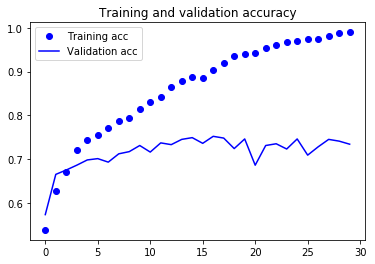

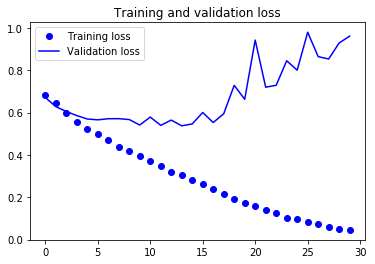

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Clear session.

In [17]:
import keras.backend as K

del model
K.clear_session()

### Train a model with augmented data.

In [18]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

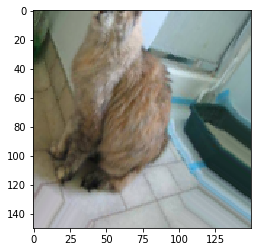

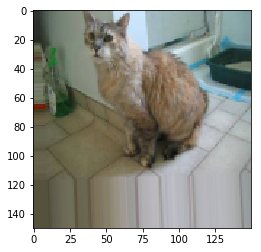

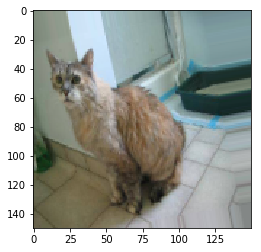

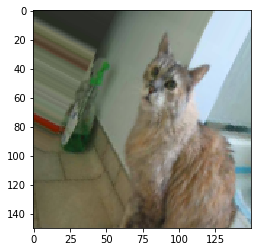

In [19]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [21]:
%%time

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=valid_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 25s 246ms/step - loss: 0.6912 - acc: 0.5175 - val_loss: 0.6910 - val_acc: 0.5190
Epoch 2/100
100/100 [==============================] - 25s 249ms/step - loss: 0.6801 - acc: 0.5531 - val_loss: 0.6580 - val_acc: 0.5805
Epoch 3/100
100/100 [==============================] - 23s 229ms/step - loss: 0.6657 - acc: 0.5835 - val_loss: 0.6456 - val_acc: 0.6250
Epoch 4/100
100/100 [==============================] - 23s 233ms/step - loss: 0.6439 - acc: 0.6222 - val_loss: 0.6458 - val_acc: 0.6018
Epoch 5/100
100/100 [==============================] - 25s 249ms/step - loss: 0.6299 - acc: 0.6353 - val_loss: 0.6101 - val_acc: 0.6631
Epoch 6/100
100/100 [==============================] - 28s 275ms/step - loss: 0.6058 - acc: 0.6631 - val_loss: 0.5973 - val_acc: 0.6778
Epoch 7/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6036 - acc: 0.6716 -

100/100 [==============================] - 23s 228ms/step - loss: 0.4136 - acc: 0.8103 - val_loss: 0.4784 - val_acc: 0.7817
Epoch 61/100
100/100 [==============================] - 23s 228ms/step - loss: 0.4151 - acc: 0.8078 - val_loss: 0.4911 - val_acc: 0.7629
Epoch 62/100
100/100 [==============================] - 25s 254ms/step - loss: 0.4186 - acc: 0.8041 - val_loss: 0.4244 - val_acc: 0.8077
Epoch 63/100
100/100 [==============================] - 25s 247ms/step - loss: 0.4056 - acc: 0.8194 - val_loss: 0.4587 - val_acc: 0.7874
Epoch 64/100
100/100 [==============================] - 23s 232ms/step - loss: 0.3980 - acc: 0.8106 - val_loss: 0.4436 - val_acc: 0.7925
Epoch 65/100
100/100 [==============================] - 22s 225ms/step - loss: 0.3955 - acc: 0.8203 - val_loss: 0.4287 - val_acc: 0.8293
Epoch 66/100
100/100 [==============================] - 23s 233ms/step - loss: 0.4094 - acc: 0.8103 - val_loss: 0.4320 - val_acc: 0.7964
Epoch 67/100
100/100 [==============================] 

In [22]:
model.save('../model/cats_and_dogs_small_2.h5')

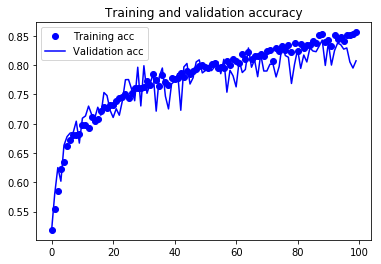

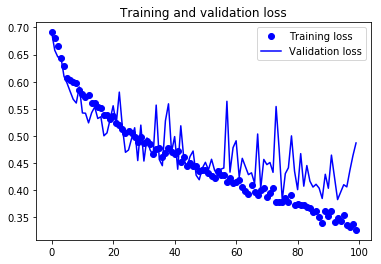

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
import keras.backend as K

del model
K.clear_session()

## 5.3 Using a pretrained convnet

In [1]:
from keras.applications import MobileNet

conv_base = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 64, 64, 32)        0         
__________

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '../data/cats_and_dogs_small/'

train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 1024))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
valid_features, valid_labels = extract_features(valid_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 1024))
valid_features = np.reshape(valid_features, (1000, 4 * 4 * 1024))
test_features = np.reshape(test_features, (1000, 4 * 4 * 1024))

In [31]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 1024))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(valid_features, valid_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 838us/step - loss: 0.2903 - acc: 0.8905 - val_loss: 0.0845 - val_acc: 0.9640
Epoch 2/30
2000/2000 [==============================] - 1s 704us/step - loss: 0.0954 - acc: 0.9610 - val_loss: 0.0712 - val_acc: 0.9710
Epoch 3/30
2000/2000 [==============================] - 1s 705us/step - loss: 0.0600 - acc: 0.9780 - val_loss: 0.0812 - val_acc: 0.9650
Epoch 4/30
2000/2000 [==============================] - 1s 701us/step - loss: 0.0312 - acc: 0.9880 - val_loss: 0.0603 - val_acc: 0.9790
Epoch 5/30
2000/2000 [==============================] - 1s 706us/step - loss: 0.0171 - acc: 0.9940 - val_loss: 0.0582 - val_acc: 0.9790
Epoch 6/30
2000/2000 [==============================] - 1s 698us/step - loss: 0.0067 - acc: 0.9980 - val_loss: 0.0628 - val_acc: 0.9780
Epoch 7/30
2000/2000 [==============================] - 1s 703us/step - loss: 0.0073 - acc: 0.9970 - val_loss: 0.0647 - val_acc: 0.9770


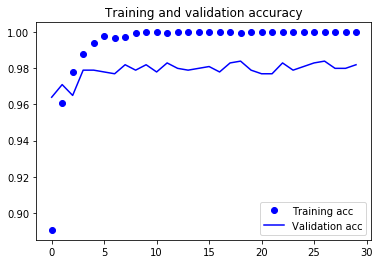

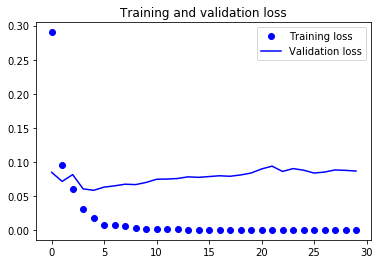

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
import keras.backend as K

del model
K.clear_session()

In [5]:
import tensorflow as tf

with tf.variable_scope(tf.get_variable_scope(), reuse=True):
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 7,423,681
Trainable params: 7,401,793
Non-trainable params: 21,888
_________________________________________________________________


In [7]:
conv_base.trainable = False

In [8]:
model.trainable_weights

[<tf.Variable 'dense_1/kernel:0' shape=(16384, 256) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(256, 1) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=valid_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 - 12s - loss: 0.4595 - acc: 0.7925 - val_loss: 0.2112 - val_acc: 0.9060
Epoch 2/30
 - 11s - loss: 0.2806 - acc: 0.8835 - val_loss: 0.0937 - val_acc: 0.9670
Epoch 3/30
 - 11s - loss: 0.2339 - acc: 0.9115 - val_loss: 0.0799 - val_acc: 0.9730
Epoch 4/30
 - 11s - loss: 0.2134 - acc: 0.9145 - val_loss: 0.0853 - val_acc: 0.9670
Epoch 5/30
 - 11s - loss: 0.1869 - acc: 0.9230 - val_loss: 0.0895 - val_acc: 0.9640
Epoch 6/30
 - 11s - loss: 0.1878 - acc: 0.9245 - val_loss: 0.0832 - val_acc: 0.9650
Epoch 7/30
 - 11s - loss: 0.1710 - acc: 0.9355 - val_loss: 0.0912 - val_acc: 0.9660
Epoch 8/30
 - 11s - loss: 0.1814 - acc: 0.9255 - val_loss: 0.1171 - val_acc: 0.9590
Epoch 9/30
 - 11s - loss: 0.1960 - acc: 0.9275 - val_loss: 0.1111 - val_acc: 0.9610
Epoch 10/30
 - 11s - loss: 0.1950 - acc: 0.9230 - val_loss: 0.1586 - val_acc: 0.9520
Epoch 11/30
 - 11s - loss: 0.1464 - acc: 0.9420 - val_loss: 0.0840 - val_ac

In [15]:
model.save('../model/cats_and_dogs_small_3.h5')

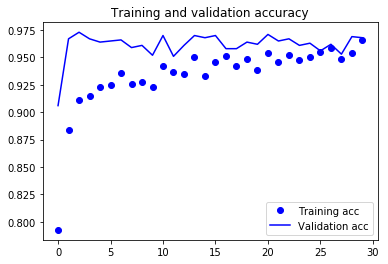

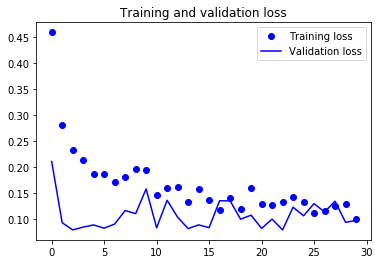

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 64, 64, 32)        0         
__________

In [20]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv_pw_13':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [21]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=valid_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 13s 127ms/step - loss: 0.1149 - acc: 0.9615 - val_loss: 0.1111 - val_acc: 0.9610
Epoch 2/100
100/100 [==============================] - 12s 117ms/step - loss: 0.1194 - acc: 0.9515 - val_loss: 0.1066 - val_acc: 0.9640
Epoch 3/100
100/100 [==============================] - 12s 116ms/step - loss: 0.0958 - acc: 0.9620 - val_loss: 0.1195 - val_acc: 0.9630
Epoch 4/100
100/100 [==============================] - 11s 113ms/step - loss: 0.1128 - acc: 0.9575 - val_loss: 0.1067 - val_acc: 0.9610
Epoch 5/100
100/100 [==============================] - 11s 114ms/step - loss: 0.1057 - acc: 0.9550 - val_loss: 0.1094 - val_acc: 0.9640
Epoch 6/100
100/100 [==============================] - 11s 113ms/step - loss: 0.0864 - acc: 0.9675 - val_loss: 0.1275 - val_acc: 0.9620
Epoch 7/100
100/100 [==============================] - 12s 116ms/step - loss: 0.1065 - acc: 0.9555 - val_loss: 0.1226 - val_acc: 0.9610
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 12s 116ms/step - loss: 0.0705 - acc: 0.9735 - val_loss: 0.1344 - val_acc: 0.9600
Epoch 62/100
100/100 [==============================] - 14s 136ms/step - loss: 0.0647 - acc: 0.9790 - val_loss: 0.1468 - val_acc: 0.9590
Epoch 63/100
100/100 [==============================] - 12s 124ms/step - loss: 0.0586 - acc: 0.9780 - val_loss: 0.1365 - val_acc: 0.9640
Epoch 64/100
100/100 [==============================] - 13s 127ms/step - loss: 0.0600 - acc: 0.9790 - val_loss: 0.1317 - val_acc: 0.9620
Epoch 65/100
100/100 [==============================] - 13s 133ms/step - loss: 0.0642 - acc: 0.9760 - val_loss: 0.1387 - val_acc: 0.9640
Epoch 66/100
100/100 [==============================] - 12s 118ms/step - loss: 0.0651 - acc: 0.9760 - val_loss: 0.1327 - val_acc: 0.9620
Epoch 67/100
100/100 [==============================] - 11s 113ms/step - loss: 0.0499 - acc: 0.9785 - val_loss: 0.1360 - val_acc: 0.9610
Epoch 68/100
100/100 [===================

In [22]:
model.save('../model.cats_and_dogs_small_4.h5')

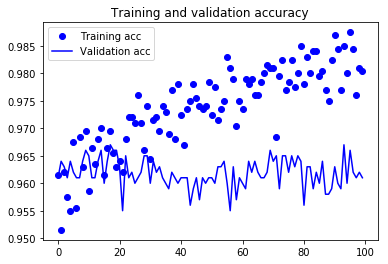

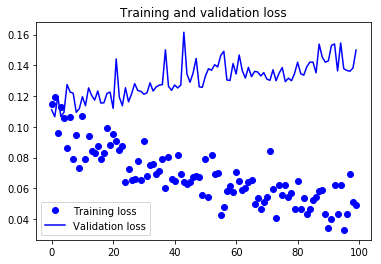

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

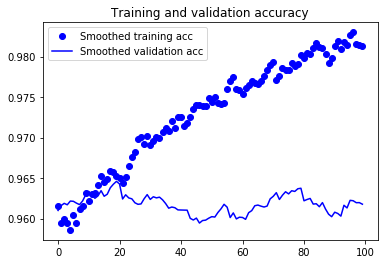

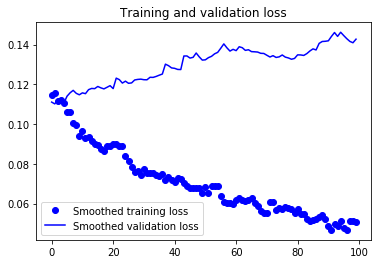

In [24]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9529999911785125


In [26]:
import keras.backend as K

del model
K.clear_session()

## 5.4 Visualizing what convets learn